<a href="https://colab.research.google.com/github/Mongiacherif/Kaggle-/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
# Matplotlib
import matplotlib.pyplot as plt
# Numpy and Pandas
import numpy as np
import pandas as pd


In [38]:
#verifier la version du tf
tf.__version__

'2.1.0'

In [0]:
#Load data 
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.cifar10.load_data()

In [40]:
print("the size of train_image ",train_image.shape)
print("the size of train_label ",train_label.shape)
print("the size of test_image ",test_image.shape)
print("the size of test_label ",test_label.shape)

the size of train_image  (50000, 32, 32, 3)
the size of train_label  (50000, 1)
the size of test_image  (10000, 32, 32, 3)
the size of test_label  (10000, 1)


In [41]:
# we have 50000 train image with 32*32 weight and height and for the 3 is the RGB 
print("the size of train_image ",train_image.shape)
print("the first train_image look like  ",train_image[1])

the size of train_image  (50000, 32, 32, 3)
the first train_image look like   [[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


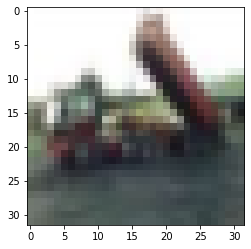

In [42]:
#Show one image 
plt.imshow(train_image[2])
#plt.title(train_label[1])
plt.show()

In [0]:
#we encode train/test labels
train_labels_encoded = tf.keras.utils.to_categorical(train_label)
test_labels_encoded = tf.keras.utils.to_categorical(test_label)

In [65]:
# we show here the difference between before and after encoded labes 
print("train_label befor encode  ",train_label[0])
print("train_label after encode  ",train_labels_encoded[0] )

train_label befor encode   [6]
train_label after encode   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Create a function that converts image to float and images value between 0 to 1
def normalize(train_image_,test_image_):
  train= train_image_.astype(float) 
  test= test_image_.astype(float) 
  train= train/255.0
  test=test/255.0
  return(train,test) 

In [0]:
#### Normalize all images in the dataset
train_image,test_image = normalize(train_image,test_image)

In [47]:
train_image[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [0]:
#### Build a function that displays a set of images with their labels based on a number of rows and columns. 
def display_images(images_, labels_, rows_, cols_):#sample here is an image from a dataset tfds
 #Create a figure object
  fig = plt.figure(figsize=(10,10))
  for img in range(rows_*cols_):
    #Add Axes via the subplot function.
    ax = fig.add_subplot(rows_,cols_,1+img)
    ax.imshow(images_[img])
    ax.set_axis_off()
   

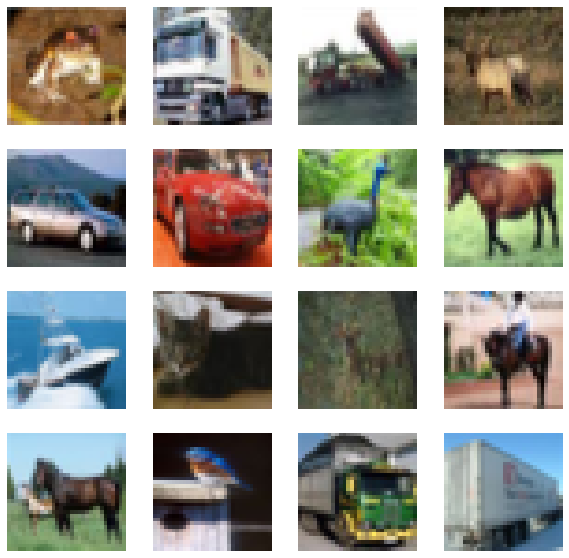

In [49]:
#### Display a few images to explore the dataset
display_images(train_image, train_label, 4, 4)

In [0]:
#### Create a basic model made of a convolutional bloc (e.g., at least one convolutional layer followed by a maxpooling layer)
model_ = tf.keras.Sequential()
model_.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model_.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model_.add(tf.keras.layers.MaxPooling2D(2, 2))
#### Flatten and add a full dense layer as well as a classification layer to your base model
model_.add(tf.keras.layers.Flatten())
model_.add(tf.keras.layers.Dense(128, activation='relu'))
model_.add(tf.keras.layers.Dense(10,activation='softmax'))

In [66]:
##summary model 
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

In [0]:
#### Compile your model 
model_.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
#### Fit your model (you can use the test set as your validation data)
history = model_.fit(train_image, train_labels_encoded, epochs=5, batch_size=64, 
                    validation_data=(test_image, test_labels_encoded))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 144s 3ms/sample - loss: 0.5091 - accuracy: 0.8237 - val_loss: 1.1092 - val_accuracy: 0.6570
Epoch 2/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.4029 - accuracy: 0.8610 - val_loss: 1.1779 - val_accuracy: 0.6755
Epoch 3/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.3070 - accuracy: 0.8943 - val_loss: 1.1761 - val_accuracy: 0.6853
Epoch 4/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.2238 - accuracy: 0.9232 - val_loss: 1.3712 - val_accuracy: 0.6742
Epoch 5/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.1630 - accuracy: 0.9451 - val_loss: 1.8732 - val_accuracy: 0.6504


In [72]:
# Evaluate your model via the evaluate function of a tf model
_, acc = model_.evaluate(test_image, test_labels_encoded, verbose=1)
print('> %.3f' % (acc * 100.0))


10000/10000 [==============================] - 8s 768us/sample - loss: 1.8732 - accuracy: 0.6504
> 65.040


In [0]:
##### Display the loss and metric curves  
def accuracy_lost(history):
  #Create a figure object
  fig = plt.figure(figsize=(8,8))
  #Add Axes via the subplot function.
  ax1=fig.add_subplot(2,1,1)
  #Define xaxis and yaxis limites 
  ax1.set_xlim(0, 5)
  ax1.set_ylim(0, 4)
  ax1.set_xlabel("X axis label")
  ax1.set_ylabel("Y axis label")
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='orange', label='test')
  ax1.set_title('Cross Entropy Loss')
  ax1.legend(['Training Loss', 'Validation Loss'])  
    #create an axe
  ax2=fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='orange', label='test')
  ax2.set_title('Cross Entropy accuracy')
  ax2.legend(['Training accuracy', 'Validation accuracy']) 

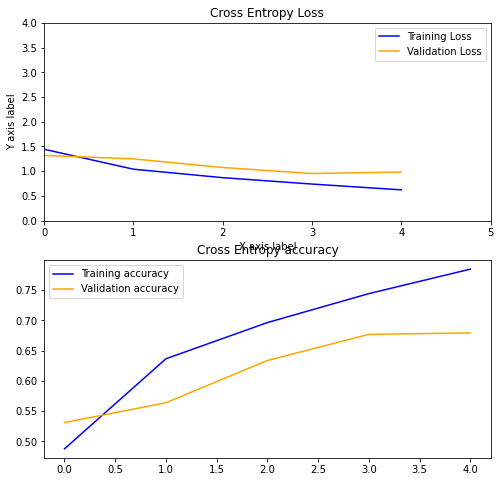

In [64]:
accuracy_lost(history)